In [1]:
import pandas as pd
import numpy as np

### getting companie and their reprisk

In [2]:
import wrds

In [215]:
conn = wrds.Connection(wrds_username='jongmok1031')

Loading library list...
Done


In [216]:
eu_coourties = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 
'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [217]:
for country in eu_coourties:
    query = conn.raw_sql("""select ri.*, ci.primary_ISIN, ci.name, ci.headquarter_country
                            from reprisk.pm_rri_data ri
                            left join reprisk.pm_company_identifiers ci
                            on ri.reprisk_id = ci.reprisk_id
                            where ci.headquarter_country = '""" + country + """' and ci.primary_isin is not null
                            """, date_cols=['date'])
    EU_companies_t = pd.DataFrame(data=query)
    if country == 'Austria':
        EU_companies = EU_companies_t
    else:
        EU_companies = pd.concat([EU_companies,EU_companies_t])

In [218]:
EU_companies

,reprisk_id,date,current_rri,rri_trend,peak_rri,peak_rri_date,reprisk_rating,country_sector_average,environmental_percentage,social_percentage,governance_percentage,primary_isin,name,headquarter_country
0,10481,2007-01-31,0.0,0.0,0.0,None,AAA,0.0,0.0,0.0,0.0,AT0000785555,Semperit AG Holding,Austria
1,10481,2007-02-28,0.0,0.0,0.0,None,AAA,0.0,0.0,0.0,0.0,AT0000785555,Semperit AG Holding,Austria
2,10481,2007-03-31,0.0,0.0,0.0,None,AAA,0.0,0.0,0.0,0.0,AT0000785555,Semperit AG Holding,Austria
3,10481,2007-04-30,0.0,0.0,0.0,None,AAA,0.0,0.0,0.0,0.0,AT0000785555,Semperit AG Holding,Austria
4,10481,2007-05-31,0.0,0.0,0.0,None,AAA,0.0,0.0,0.0,0.0,AT0000785555,Semperit AG Holding,Austria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39811,8608,2020-08-31,0.0,0.0,0.0,None,AAA,19.0,0.0,0.0,0.0,SE0005126729,PA Resources AB,Sweden
39812,8608,2020-09-30,0.0,0.0,0.0,None,AAA,19.0,0.0,0.0,0.0,SE0005126729,PA Resources AB,Sweden
39813,8608,2020-10-31,0.0,0.0,0.0,None,AAA,19.0,0.0,0.0,0.0,SE0005126729,PA Resources AB,Sweden
39814,8608,2020-11-30,0.0,0.0,0.0,None,AAA,19.0,0.0,0.0,0.0,SE0005126729,PA Resources AB,Sweden


### getting tickers for the companies above

In [219]:
from time import sleep
import requests
import timeit

In [220]:
isins = list(EU_companies['primary_isin'].unique())

In [221]:
len(isins)

2503

In [222]:
def get_ticker_form_isin(isin):

    # https://www.openfigi.com/api
    #import requests

    url = 'https://api.openfigi.com/v1/mapping'
    headers = {'Content-Type':'text/json', 'X-OPENFIGI-APIKEY':'46a82b66-6569-4077-b14a-2aa771bb933f' }
    payload = '[{"idType":"ID_ISIN","idValue":"' + isin + '"}]'

    r = requests.post(url, headers=headers, data=payload)
    
    try:
        return r.json()[0].get('data')[0].get('ticker'), r.json()[0].get('data')[0].get('exchCode')
    # apparently this gets bloomberg exchange code
    except:
        return 'fail', 'fail'

In [230]:
i

915

In [229]:
isins[i]

'DE000WLB87S3'

timeout at isin DE000WLB87S3, i = 915

In [ ]:
#tickers = []
#exch_codes = []

In [232]:
for i in range(915, len(isins)):
    if i%25 == 0 and i != 0:
        print("25 isins done " + str(len(isins) - i) + " to go")
    
    ticker, exch_code = get_ticker_form_isin(isins[i])
    tickers.append(ticker)
    exch_codes.append(exch_code)
    
    # API limit 25 per requests per 6 seconds
    sleep(6/22)

25 isins done 1578 to go
25 isins done 1553 to go
25 isins done 1528 to go
25 isins done 1503 to go
25 isins done 1478 to go
25 isins done 1453 to go
25 isins done 1428 to go
25 isins done 1403 to go
25 isins done 1378 to go
25 isins done 1353 to go
25 isins done 1328 to go
25 isins done 1303 to go
25 isins done 1278 to go
25 isins done 1253 to go
25 isins done 1228 to go
25 isins done 1203 to go
25 isins done 1178 to go
25 isins done 1153 to go
25 isins done 1128 to go
25 isins done 1103 to go
25 isins done 1078 to go
25 isins done 1053 to go
25 isins done 1028 to go
25 isins done 1003 to go
25 isins done 978 to go
25 isins done 953 to go
25 isins done 928 to go
25 isins done 903 to go
25 isins done 878 to go
25 isins done 853 to go
25 isins done 828 to go
25 isins done 803 to go
25 isins done 778 to go
25 isins done 753 to go
25 isins done 728 to go
25 isins done 703 to go
25 isins done 678 to go
25 isins done 653 to go
25 isins done 628 to go
25 isins done 603 to go
25 isins done 57

In [233]:
isins_ticker = pd.DataFrame([isins, tickers, exch_codes]).T
isins_ticker.columns = ['isin', 'ticker', 'exch_code_bl']

In [234]:
isins_ticker.to_csv('isins_ticker_eu.csv')

,isin,ticker,exch_code_bl
0,AT0000785555,SEM,AV
1,AT0000A04AF6,fail,fail
2,AT0000A24UY3,BRLS 1.75 12/10/25,VIENNA
3,AT0000720206,LEIP,AV
4,AT0000758305,PAL,AV
...,...,...,...
2498,SE0000191827,ATRLJB,SS
2499,SE0010468918,LYKOA,SS
2500,SE0000936478,INJJF,US
2501,SE0011166974,FABG,SS


### getting monthly returns

In [235]:
import pandas_datareader as web

In [236]:
exchages_codes = pd.read_csv('Global Stock Exchanges.csv')
exchages_codes['# of Stocks'] = exchages_codes['# of Stocks'].apply(lambda x: x.replace(',', ''))
exchages_codes['# of Stocks'] = exchages_codes['# of Stocks'].astype(int)
def get_eod_code_from_bloomberg(bloomberg_code):
    try:
        return exchages_codes[exchages_codes['Bloomberg Exchange Code'] == bloomberg_code]['EOD code'].values[0]
    except:
        try:
            return exchages_codes[exchages_codes['Bloomberg Composite Code'] == bloomberg_code]\
                    [exchages_codes[exchages_codes['Bloomberg Composite Code'] == bloomberg_code]['# of Stocks'] == 
                     exchages_codes[exchages_codes['Bloomberg Composite Code'] == bloomberg_code]['# of Stocks'].max()]\
                    ['EOD code'].values[0]
        except:
            return 'fail'

In [237]:
isins_ticker['exch_code_eod'] = isins_ticker['exch_code_bl'].apply(lambda x: get_eod_code_from_bloomberg(x))

In [238]:
isins_ticker['ticker_final'] = isins_ticker['ticker'] + "." + isins_ticker['exch_code_eod']
isins_ticker.loc[isins_ticker['ticker'] == 'fail','ticker_final'] = 'fail'

In [239]:
isins_ticker.loc[isins_ticker['exch_code_eod'] == 'fail', 'ticker_final'] = 'fail'
isins_ticker.loc[isins_ticker['exch_code_eod'] == 'US', 'ticker_final'] = isins_ticker[isins_ticker['exch_code_eod'] == 'US']['ticker']

In [255]:
#isins_ticker.to_csv('isins_ticker_eu.csv', index = False)

In [265]:
m_returns = pd.DataFrame(columns = ['date', 'monthly_return', 'ticker'])
monthly_returns_t = pd.DataFrame(columns = ['date', 'monthly_return', 'ticker'])
for i in range(isins_ticker.shape[0]):
    ticker = isins_ticker.loc[i]['ticker']
    if ticker != 'fail':
        try:
            returns = web.get_data_yahoo(ticker,
                                start = "2006-12-29",
                                end = "2020-12-31") # dates of reprisk data
            monthly_returns_t = returns['Adj Close'].resample('M').ffill().pct_change()
            monthly_returns_t = pd.DataFrame(monthly_returns_t[1:]).reset_index()
            monthly_returns_t['ticker'] = ticker
            monthly_returns_t.columns = ['date', 'monthly_return', 'ticker']
        except:
            monthly_returns_t['ticker'] = ticker
            monthly_returns_t['monthly_return'] = 'fail'
    else:
        monthly_returns_t = pd.DataFrame(columns = ['date', 'monthly_return', 'ticker'])
    m_returns = pd.concat([m_returns,monthly_returns_t])
    if i%20 == 0 and i != 0:
        print('20 requests, ' + str(isins_ticker.shape[0]-i) + ' left' )

20 requests, 2483 left
20 requests, 2463 left
20 requests, 2443 left
20 requests, 2423 left
20 requests, 2403 left
20 requests, 2383 left
20 requests, 2363 left
20 requests, 2343 left
20 requests, 2323 left
20 requests, 2303 left
20 requests, 2283 left
20 requests, 2263 left
20 requests, 2243 left
20 requests, 2223 left
20 requests, 2203 left
20 requests, 2183 left
20 requests, 2163 left
20 requests, 2143 left
20 requests, 2123 left
20 requests, 2103 left
20 requests, 2083 left
20 requests, 2063 left
20 requests, 2043 left
20 requests, 2023 left
20 requests, 2003 left
20 requests, 1983 left
20 requests, 1963 left
20 requests, 1943 left
20 requests, 1923 left
20 requests, 1903 left
20 requests, 1883 left
20 requests, 1863 left
20 requests, 1843 left
20 requests, 1823 left
20 requests, 1803 left
20 requests, 1783 left
20 requests, 1763 left
20 requests, 1743 left
20 requests, 1723 left
20 requests, 1703 left
20 requests, 1683 left
20 requests, 1663 left
20 requests, 1643 left
20 requests

In [266]:
m_returns

,date,monthly_return,ticker
0,2007-02-28,-0.0130159,SEM.VI
1,2007-03-31,0.0614345,SEM.VI
2,2007-04-30,0.0403031,SEM.VI
3,2007-05-31,0.00353618,SEM.VI
4,2007-06-30,-0.0535713,SEM.VI
...,...,...,...
61,2020-08-31,-0.0226059,HOVD.ST
62,2020-09-30,0.205752,HOVD.ST
63,2020-10-31,-0.0972477,HOVD.ST
64,2020-11-30,-0.115854,HOVD.ST


In [267]:
#m_returns.to_csv('m_returns_eu.csv')

## joining returns on reprisk data

In [244]:
isins_ticker = isins_ticker[['isin', 'ticker_final']]
isins_ticker.columns = ['primary_isin', 'ticker']
isins_ticker

,primary_isin,ticker
0,AT0000785555,SEM.VI
1,AT0000A04AF6,fail
2,AT0000A24UY3,fail
3,AT0000720206,LEIP.VI
4,AT0000758305,PAL.VI
...,...,...
2498,SE0000191827,ATRLJB.ST
2499,SE0010468918,LYKOA.ST
2500,SE0000936478,INJJF
2501,SE0011166974,FABG.ST


In [276]:
EU_companies = EU_companies.merge(isins_ticker, how = 'inner', on = 'primary_isin')

In [279]:
EU_companies = EU_companies.merge(m_returns, how = 'left', on = ['ticker', 'date'])

In [281]:
EU_companies = EU_companies[EU_companies['ticker'] != 'fail']

In [282]:
EU_companies = EU_companies[EU_companies['monthly_return'] != 'fail']

In [283]:
EU_companies['primary_isin'].nunique()

1480

In [296]:
EU_companies[EU_companies['monthly_return'].notna()]['primary_isin'].nunique()

645

In [291]:
#EU_companies.to_csv('1480_EU_companies.csv', index = False)

In [284]:
from dateutil.relativedelta import relativedelta

In [285]:
import matplotlib.pyplot as plt

In [286]:
n_companies = []
months = []
for i in range(167):
    months.append(i)
    n_companies.append(EU_companies[EU_companies['date'] == EU_companies['date'][0] 
                                   + relativedelta(months=i)]['monthly_return'].notna().sum())

Text(0.5, 0, 'time in months from start 2007 to end 2020')

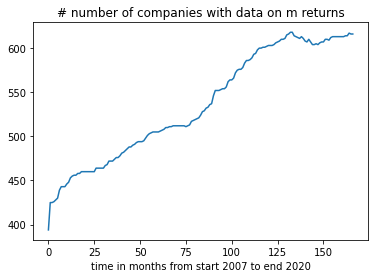

In [287]:
plt.plot(months, n_companies)
plt.title('# number of companies with data on m returns')
plt.xlabel('time in months from start 2007 to end 2020')

In [288]:
# these ticker might be wrong, should better delete them
counter = 0
bad_tickers = []
for i in list(EU_companies['ticker'].unique()):
    if i.find(' ') > 0:
        bad_tickers.append(i)
        counter += 1

In [289]:
bad_tickers

[]